# Predicting Airbnb Listing Prices with Multiple Regression

In this exercise, we will build a multiple regression model to predict Airbnb listing prices. We will work through the following steps:

1. **Data Loading & Exploratory Data Analysis (EDA)**
2. **Splitting the Data into Training and Testing Sets**
3. **Fitting the Multiple Regression Model**
4. **Model Diagnostics**
5. **Evaluating Model Performance on the Test Set**

## 1. Data Loading

In this step, we load the dataset, inspect its structure, and perform basic exploratory analysis.

In [22]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('regression/airbnb_listings.csv')

# Display the first few rows to inspect the data
data.head()

,Price,Minimum_Nights,Accommodates,Bedrooms,Bathrooms,Distance_CityCenter,Review_Score,Number_of_Reviews,Amenities_Score,Superhost,Listing_Age,Room_Type
0,244.33,7,2,5,2.3,1.6,4.7,132,2,0,6,Shared room
1,178.13,4,1,2,2.3,3.7,4.7,357,3,0,2,Entire home/apt
2,240.47,8,7,0,2.7,1.4,4.7,258,9,1,0,Entire home/apt
3,173.71,5,7,0,1.5,1.4,3.9,436,7,0,4,Entire home/apt
4,259.00,7,8,3,2.0,3.5,3.4,22,7,1,1,Entire home/apt


## 2. Splitting the Data into Training and Testing Sets

We split our data so that we can train the model on one set and evaluate its performance on unseen data.

In [49]:
from sklearn.model_selection import train_test_split

# Split the data: 70% for training, 30% for testing
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

print("Full data set shape", data.shape,"\n---")
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Full data set shape (100, 12) 
---
Training set shape: (70, 12)
Testing set shape: (30, 12)


## 3. Fitting the Multiple Regression Model

We fit a multiple regression model using the training data. The mathematical specification of the model is:

$$
\begin{aligned}
\text{Price}_i &= \beta_0 + \beta_1 \cdot \text{Minimum\_Nights}_i + \beta_2 \cdot \text{Accommodates}_i + \beta_3 \cdot \text{Bedrooms}_i \\
&\quad + \beta_4 \cdot \text{Bathrooms}_i + \beta_5 \cdot \text{Distance\_CityCenter}_i + \beta_6 \cdot \text{Review\_Score}_i \\
&\quad + \beta_7 \cdot \text{Number\_of\_Reviews}_i + \beta_8 \cdot \text{Amenities\_Score}_i + \beta_9 \cdot \text{Superhost}_i \\
&\quad + \beta_{10} \cdot \text{Listing\_Age}_i + \beta_{11} \cdot \text{Room\_Type\_Private}_i \\
&\quad + \beta_{12} \cdot \text{Room\_Type\_Shared}_i + \epsilon_i
\end{aligned}
$$


Here, we’ll use the Ordinary Least Squares (OLS) method from the statsmodels library to estimate the regression weights ($\beta_i$$).

In [62]:
import statsmodels.formula.api as smf

# Define the model formula:
# "Price" is our dependent variable.
# The tilde (~) separates the dependent variable from the predictors.
# C(Room_Type) tells statsmodels to treat Room_Type as a categorical variable.
formula = ("Price ~ Minimum_Nights + Accommodates + Bedrooms + Bathrooms + "
           "Distance_CityCenter + Review_Score + Number_of_Reviews + Amenities_Score + "
           "Superhost + Listing_Age + C(Room_Type)")

#formula = ("Price ~ Minimum_Nights")

# Fit the model using the training data
model = smf.ols(formula=formula, data=train_data).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 11 Feb 2025   Prob (F-statistic):           4.69e-37
Time:                        10:40:16   Log-Likelihood:                -249.28
No. Observations:                  70   AIC:                             524.6
Df Residuals:                      57   BIC:                             553.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

## 5. Model Diagnostics

After fitting the model, we should check its assumptions by analyzing residuals and potential multicollinearity.

Test Set Performance:
Mean Squared Error (MSE): 116.35406154945798
Root Mean Squared Error (RMSE): 10.786753985766895
Mean Absolute Error (MAE): 8.439541577175971


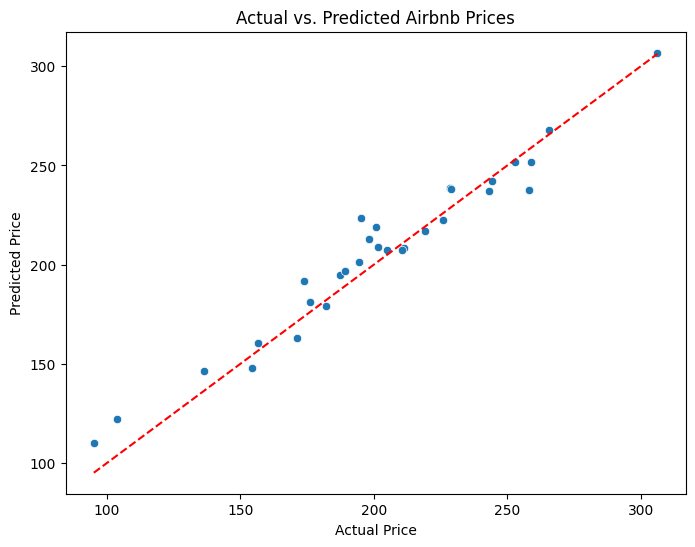

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Use the fitted model to predict the test set prices
predictions = model.predict(test_data)

# Calculate performance metrics
mse = mean_squared_error(test_data['Price'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data['Price'], predictions)

print("Test Set Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted prices for visual comparison
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_data['Price'], y=predictions)
plt.plot([test_data['Price'].min(), test_data['Price'].max()],
         [test_data['Price'].min(), test_data['Price'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Airbnb Prices')
plt.show()